# Pertemuan 7 - PCD

## 1. Deteksi Tepi (Sobel & Canny)

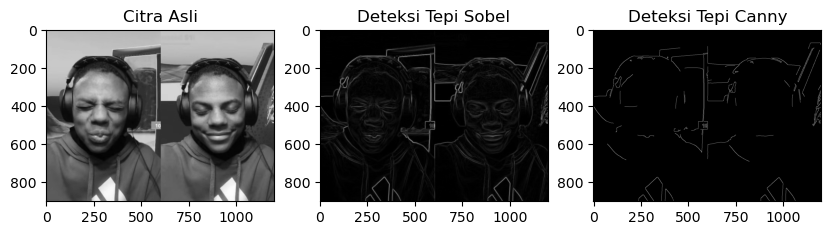

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra
img = cv2.imread('ishowspeed.jpg', 0) # Baca citra dalam grayscale [cite: 18]

# 1. Pra-pemrosesan - penghalusan dengan Gaussian [cite: 19]
blurred_img = cv2.GaussianBlur(img, (5, 5), 0)

# 2. Deteksi tepi dengan Sobel [cite: 19]
sobelx = cv2.Sobel(blurred_img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(blurred_img, cv2.CV_64F, 0, 1, ksize=3)
sobel = np.hypot(sobelx, sobely) # Magnitude total [cite: 19, 22]

# 3. Deteksi tepi dengan Canny [cite: 20, 23]
canny_edges = cv2.Canny(blurred_img, 100, 200)

# 4. Tampilkan hasil [cite: 20]
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Citra Asli")
plt.imshow(img, cmap='gray')
plt.subplot(1, 3, 2)
plt.title("Deteksi Tepi Sobel")
plt.imshow(sobel, cmap='gray')
plt.subplot(1, 3, 3)
plt.title("Deteksi Tepi Canny")
plt.imshow(canny_edges, cmap='gray')
plt.show()

## 2. Segmentasi Warna Biru (HSV Thresholding)

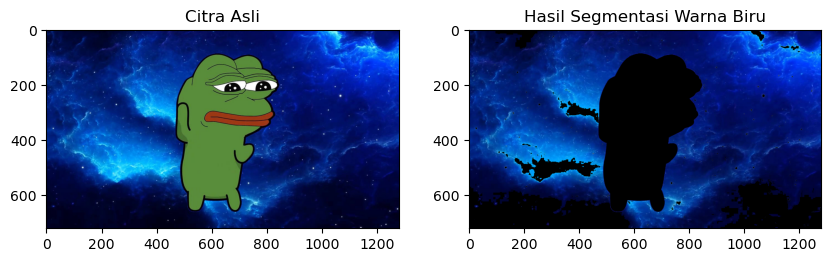

In [86]:
# Baca citra
img = cv2.imread('frog.jpg') # Citra dalam format BGR [cite: 48]

# 1. Konversi ke ruang warna HSV [cite: 49, 52]
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 2. Tentukan rentang warna untuk segmentasi (Contoh: Biru) [cite: 49]
lower_blue = np.array([100, 150, 50]) # Rentang bawah dalam HSV
upper_blue = np.array([130, 255, 255]) # Rentang atas dalam HSV

# 3. Segmentasi dengan Thresholding (membuat mask) [cite: 50, 53]
mask = cv2.inRange(hsv_img, lower_blue, upper_blue)

# 4. Hasil segmentasi (aplikasikan mask ke citra asli) [cite: 50, 54]
segmented_img = cv2.bitwise_and(img, img, mask=mask)

# 5. Tampilkan hasil [cite: 51]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Citra Asli")
# Konversi BGR ke RGB untuk plotting yang benar dengan Matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title("Hasil Segmentasi Warna Biru")
plt.imshow(cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB))
plt.show()

## 3. Segmentasi Warna (K-Means Clustering)

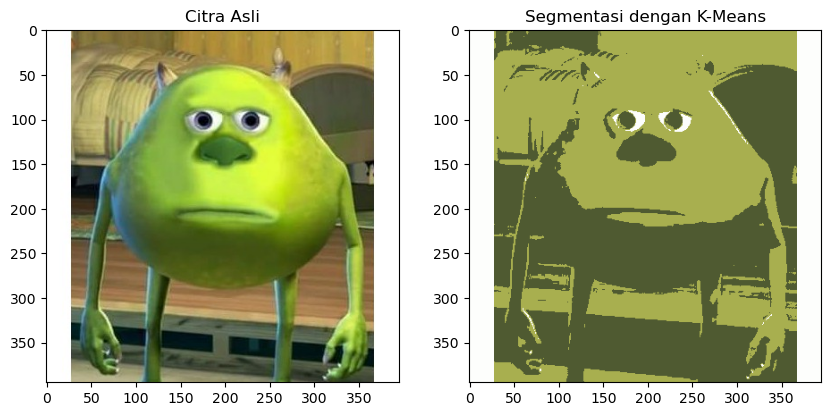

In [82]:
# Baca citra
img = cv2.imread('mike.jpg') # Citra dalam format BGR [cite: 55]

# 1. Ubah citra menjadi bentuk array 1D piksel (untuk K-Means) [cite: 56, 60]
# Reshape image ke (jumlah_piksel, 3)
Z = img.reshape((-1, 3))
Z = np.float32(Z)

# 2. Tentukan k (jumlah cluster/warna) dan kriteria K-Means [cite: 57, 60]
K = 3 # Misal, kelompokkan menjadi 3 warna dominan
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
ret, labels, centers = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# 3. Konversi kembali pusat cluster ke nilai 8-bit dan rekonstruksi citra [cite: 58, 61]
centers = np.uint8(centers)
# Setiap piksel diganti dengan warna pusat clusternya
segmented_data = centers[labels.flatten()]
# Reshape kembali ke dimensi citra asli
segmented_img = segmented_data.reshape((img.shape))

# 4. Tampilkan hasil [cite: 59]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Citra Asli")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # Konversi ke RGB untuk tampilan
plt.subplot(1, 2, 2)
plt.title("Segmentasi dengan K-Means")
plt.imshow(cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB)) # Konversi ke RGB untuk tampilan
plt.show()